In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', '{:2f}'.format)

In [7]:
# Импорт данных
PATH = 'D:/Python Project/fms/data/data.csv'
data = pd.read_csv(PATH)

In [8]:
data.columns = data.columns.str.lower().str.replace(' ','_')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
grouped_avg_count_make = data.groupby('make').agg({'msrp': 'mean', 'make': 'count'}).rename(columns={'msrp': 'Average Cost', 'make': 'Count'})
grouped_avg_count_make

,Average Cost,Count
make,,
Acura,34887.587302,252
Alfa Romeo,61600.000000,5
Aston Martin,197910.376344,93
Audi,53452.112805,328
BMW,61546.763473,334
Bentley,247169.324324,74
Bugatti,1757223.666667,3
Buick,28206.612245,196
Cadillac,56231.317380,397


In [34]:
# Регрессия на числовых принаках
df = data._get_numeric_data()
df.fillna(df.mean(),inplace=True)

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
0,2011,335.000000,6.000000,2.000000,26,19,3916,46135
1,2011,300.000000,6.000000,2.000000,28,19,3916,40650
2,2011,300.000000,6.000000,2.000000,28,20,3916,36350
3,2011,230.000000,6.000000,2.000000,28,18,3916,29450
4,2011,230.000000,6.000000,2.000000,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.000000,6.000000,4.000000,23,16,204,46120
11910,2012,300.000000,6.000000,4.000000,23,16,204,56670
11911,2012,300.000000,6.000000,4.000000,23,16,204,50620
11912,2013,300.000000,6.000000,4.000000,23,16,204,50920


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Добавление новых признаков
df['msrp'] = np.log1p(df['msrp'])
df['age'] = 2023 - df['year']
df['average_mpg'] = (df['highway_mpg'] + df['city_mpg']) / 2

# Разделение данных на тренировочную и тестовую выборку
X = df[['engine_hp', 'number_of_doors', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'average_mpg']]
y = df['msrp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных и вычисление среднеквадратичной ошибки
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Среднеквадратичная ошибка: {mse}")


Среднеквадратичная ошибка: 0.0024551435697771767


<Axes: xlabel='msrp', ylabel='Count'>

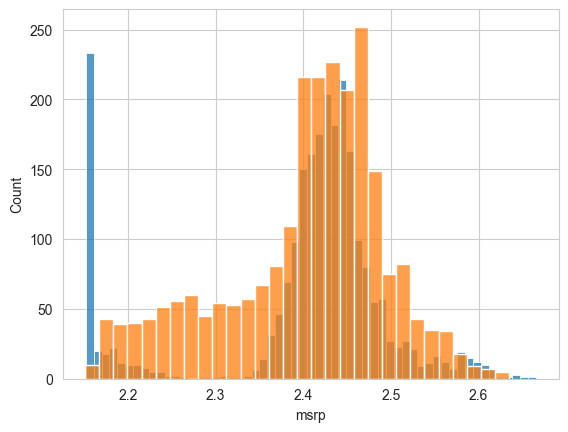

In [41]:
sns.histplot(y_test)
sns.histplot(y_pred)

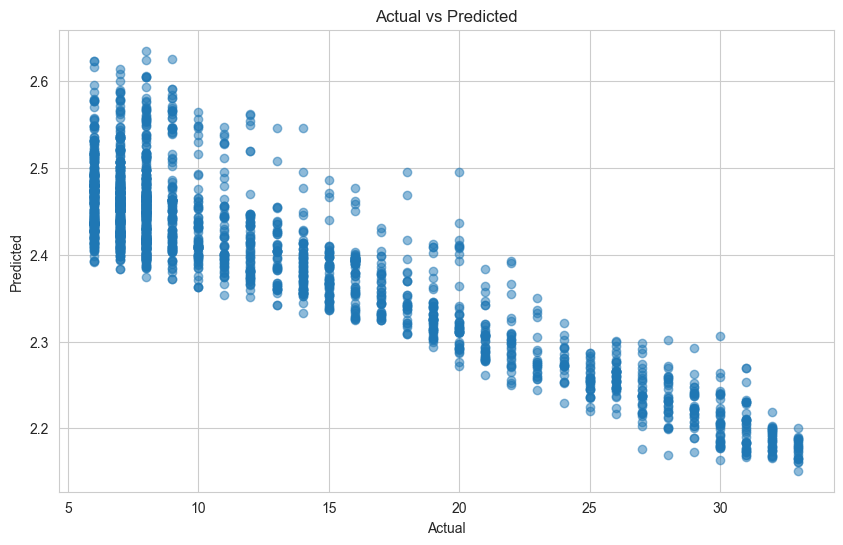

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Построение диаграммы рассеяния
plt.scatter(X_test['age'], y_pred, alpha=0.5)

# Построение линии идеального прогноза
#plt.plot(y_test, y_test, color='red')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.show()


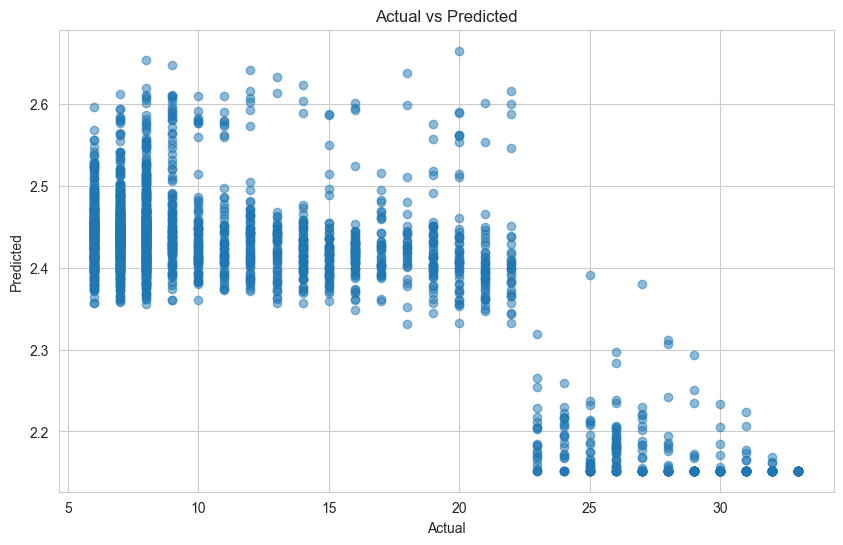

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Построение диаграммы рассеяния
plt.scatter(X_test['age'], y_test, alpha=0.5)

# Построение линии идеального прогноза
#plt.plot(y_test, y_test, color='red')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.show()


In [54]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Средняя абсолютная ошибка: {mae}")


Средняя абсолютная ошибка: 0.037490284681840624


In [55]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

R^2 score: 0.7888797935176937


In [56]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.04954940534231644
